In [1]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/Kaiyu/Downloads/HDFCBANK.csv',parse_dates=True)
df = pd.DataFrame(df)

df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [3]:
df

Date         Open         High          Low        Close  \
0     2020-01-01  1276.099976  1280.000000  1270.599976  1278.599976   
1     2020-01-02  1279.000000  1288.000000  1279.000000  1286.750000   
2     2020-01-03  1282.199951  1285.000000  1263.599976  1268.400024   
3     2020-01-06  1260.000000  1261.800049  1236.000000  1240.949951   
4     2020-01-07  1258.900024  1271.449951  1252.250000  1260.599976   
...          ...          ...          ...          ...          ...   
1006  2024-01-19  1505.949951  1510.250000  1468.400024  1470.650024   
1007  2024-01-23  1465.000000  1474.699951  1425.000000  1427.349976   
1008  2024-01-24  1380.250000  1458.449951  1380.250000  1455.900024   
1009  2024-01-25  1452.500000  1457.349976  1419.400024  1434.900024   
1010  2024-01-29  1448.050049  1462.800049  1445.800049  1454.650024   

        Adj Close    Volume  
0     1244.189697   1836849  
1     1252.120361   3068583  
2     1234.264160   5427775  
3     1207.552856   5445093  
4     1226.674194   7362247  
...           ...       ...  
1006  1470.650024  54800269  
1007  1427.349976  57734701  
1008  1455.900024  43002202  
1009  1434.900024  49470926  
1010  1454.650024  32822749  

[1011 rows x 7 columns]

In [4]:
df=df[["Date","High"]]
df.head()

Date         High
0  2020-01-01  1280.000000
1  2020-01-02  1288.000000
2  2020-01-03  1285.000000
3  2020-01-06  1261.800049
4  2020-01-07  1271.449951

In [5]:
df.columns = ['ds','y']
df.tail()

ds            y
1006  2024-01-19  1510.250000
1007  2024-01-23  1474.699951
1008  2024-01-24  1458.449951
1009  2024-01-25  1457.349976
1010  2024-01-29  1462.800049

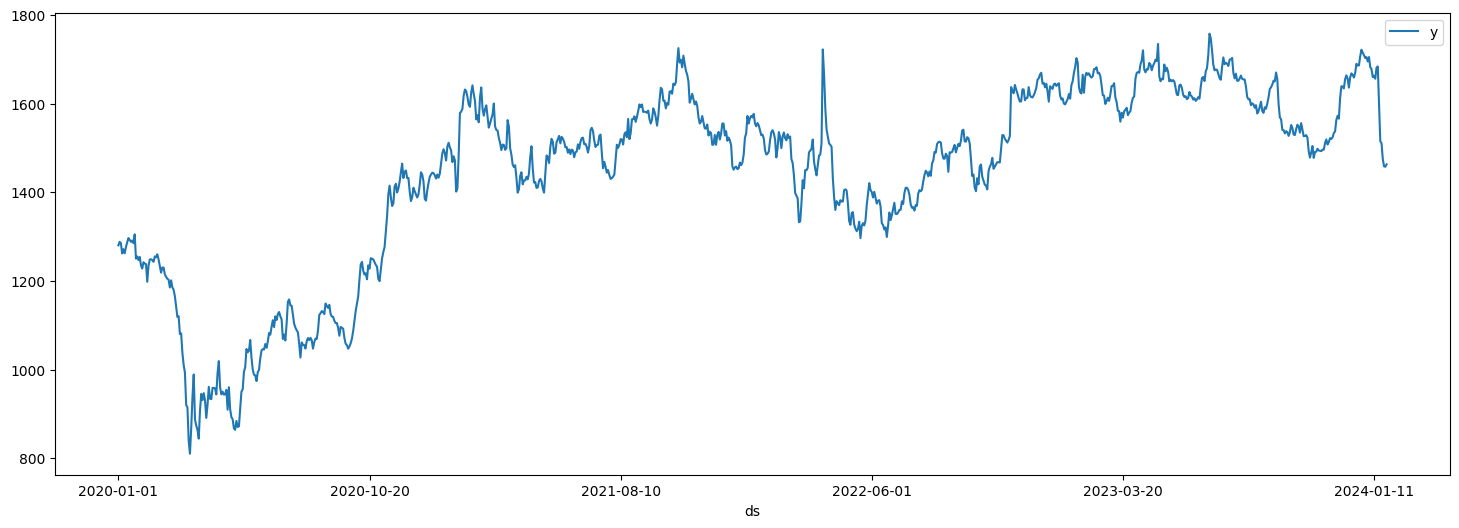

In [6]:
df.plot(x='ds',y='y',figsize=(18,6))
plt.show()

In [7]:
df = df[df['ds'] >= '2020-04-01']
# df = df[(df['ds'].dt.year >= 2022) & (df['ds'].dt.year <= df['ds'].dt.year.max())]

In [8]:
df

ds            y
63    2020-04-01   863.849976
64    2020-04-03   844.000000
65    2020-04-07   907.299988
66    2020-04-08   945.000000
67    2020-04-09   930.900024
...          ...          ...
1006  2024-01-19  1510.250000
1007  2024-01-23  1474.699951
1008  2024-01-24  1458.449951
1009  2024-01-25  1457.349976
1010  2024-01-29  1462.800049

[948 rows x 2 columns]

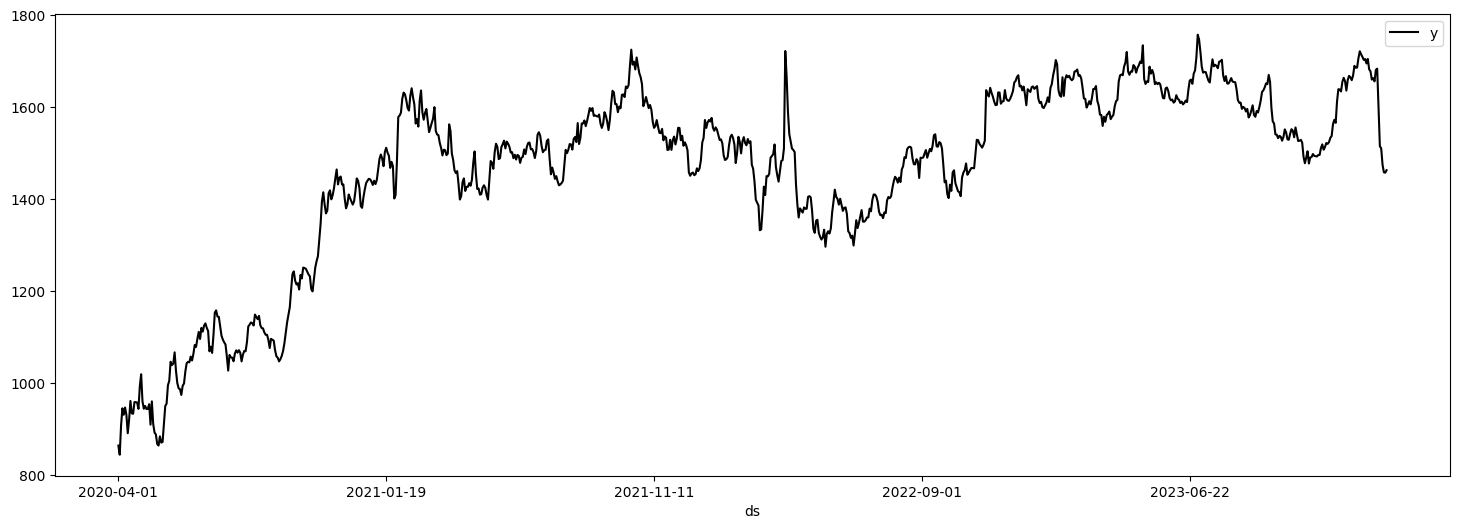

In [9]:
df.plot(x='ds',y='y',figsize=(18,6),color='black')
plt.show()

In [10]:
len(df)

948

In [11]:
train = df.iloc[:len(df)-20]
test = df.iloc[len(df)-20:]

In [12]:
train

ds            y
63   2020-04-01   863.849976
64   2020-04-03   844.000000
65   2020-04-07   907.299988
66   2020-04-08   945.000000
67   2020-04-09   930.900024
..          ...          ...
986  2023-12-21  1689.750000
987  2023-12-22  1685.900024
988  2023-12-26  1685.949951
989  2023-12-27  1706.500000
990  2023-12-28  1721.400024

[928 rows x 2 columns]

In [13]:
test

ds            y
991   2023-12-29  1714.900024
992   2024-01-01  1709.150024
993   2024-01-02  1702.800049
994   2024-01-03  1704.699951
995   2024-01-04  1694.949951
996   2024-01-05  1704.900024
997   2024-01-08  1682.349976
998   2024-01-09  1677.800049
999   2024-01-10  1659.949951
1000  2024-01-11  1662.900024
1001  2024-01-12  1656.000000
1002  2024-01-15  1680.900024
1003  2024-01-16  1683.650024
1004  2024-01-17  1596.800049
1005  2024-01-18  1515.000000
1006  2024-01-19  1510.250000
1007  2024-01-23  1474.699951
1008  2024-01-24  1458.449951
1009  2024-01-25  1457.349976
1010  2024-01-29  1462.800049

In [14]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=734) #MS for monthly, H for hourly
forecast = m.predict(future)

11:45:41 - cmdstanpy - INFO - Chain [1] start processing
11:45:41 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(480)

ds         yhat   yhat_lower   yhat_upper
1182 2024-09-08  1456.688770  1287.176113  1637.206901
1183 2024-09-09  1472.879201  1309.247842  1644.796795
1184 2024-09-10  1472.749867  1312.754441  1650.421477
1185 2024-09-11  1473.135075  1314.836736  1644.050643
1186 2024-09-12  1467.335579  1299.069441  1643.324660
...         ...          ...          ...          ...
1657 2025-12-27  1403.389810   614.334791  2216.336480
1658 2025-12-28  1313.334388   521.902468  2141.905842
1659 2025-12-29  1331.963869   536.498635  2173.689970
1660 2025-12-30  1334.461064   517.145521  2177.632231
1661 2025-12-31  1337.609719   538.079922  2181.704644

[480 rows x 4 columns]

In [16]:
forecast['yhat']=(forecast['yhat']+forecast['yhat_upper'] )/ 2

In [17]:
plot_plotly(m ,forecast)

In [18]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[-20:]['yhat']
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  166.42254749761415
Mean Value of Test Dataset: 1620.51500235


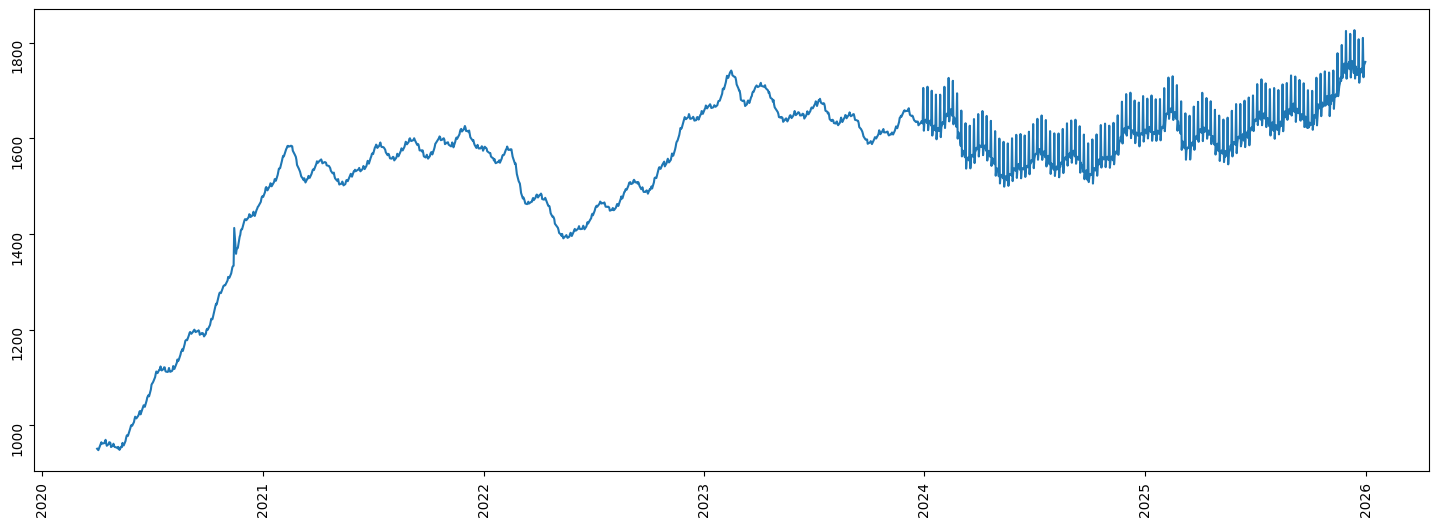

In [19]:
forecast['ds'] = pd.to_datetime(forecast['ds'])

forecast = forecast.dropna(subset=['yhat'])

plt.figure(figsize=(18, 6))
plt.plot(forecast['ds'], forecast['yhat'])
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

In [20]:
forecast = forecast[(forecast['ds'] >= '2024-02-01') & (forecast['ds'].dt.year <= forecast['ds'].dt.year.max())]
forecast=forecast[['ds','yhat']]
forecast.reset_index(drop=True, inplace=True)

In [21]:
forecast

ds         yhat
0   2024-02-01  1633.417339
1   2024-02-02  1630.507544
2   2024-02-03  1707.703634
3   2024-02-04  1621.516883
4   2024-02-05  1643.368288
..         ...          ...
695 2025-12-27  1809.863145
696 2025-12-28  1727.620115
697 2025-12-29  1752.826919
698 2025-12-30  1756.046648
699 2025-12-31  1759.657181

[700 rows x 2 columns]

In [22]:
result_df=pd.read_csv('E:/forecast.csv')
result_df = pd.DataFrame(result_df)

In [23]:
result_df

0             1           2             3
0    2024-01-01  4.005375e+06  2024-02-01  22018.440428
1    2024-01-02  3.998168e+06  2024-02-02  22005.386495
2    2024-01-03  4.015374e+06  2024-02-03  21330.332854
3    2024-01-04  4.046743e+06  2024-02-04  21377.546742
4    2024-01-05  4.045816e+06  2024-02-05  22088.238356
..          ...           ...         ...           ...
510  2025-05-25  8.076151e+06         NaN           NaN
511  2025-05-26  8.099044e+06         NaN           NaN
512  2025-05-27  8.147366e+06         NaN           NaN
513  2025-05-28  8.132137e+06         NaN           NaN
514  2025-05-29  8.125824e+06         NaN           NaN

[515 rows x 4 columns]

In [24]:
result_df = pd.concat([result_df,forecast],axis=1,ignore_index=True)

In [25]:
result_df

0             1           2             3          4  \
0    2024-01-01  4.005375e+06  2024-02-01  22018.440428 2024-02-01   
1    2024-01-02  3.998168e+06  2024-02-02  22005.386495 2024-02-02   
2    2024-01-03  4.015374e+06  2024-02-03  21330.332854 2024-02-03   
3    2024-01-04  4.046743e+06  2024-02-04  21377.546742 2024-02-04   
4    2024-01-05  4.045816e+06  2024-02-05  22088.238356 2024-02-05   
..          ...           ...         ...           ...        ...   
695         NaN           NaN         NaN           NaN 2025-12-27   
696         NaN           NaN         NaN           NaN 2025-12-28   
697         NaN           NaN         NaN           NaN 2025-12-29   
698         NaN           NaN         NaN           NaN 2025-12-30   
699         NaN           NaN         NaN           NaN 2025-12-31   

               5  
0    1633.417339  
1    1630.507544  
2    1707.703634  
3    1621.516883  
4    1643.368288  
..           ...  
695  1809.863145  
696  1727.620115  
697  1752.826919  
698  1756.046648  
699  1759.657181  

[700 rows x 6 columns]

In [26]:
result_df.to_csv('forecast.csv', index=False)